In [123]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as am
import matplotlib.colors as mcolors

In [8]:
df = pd.read_csv('Data/PCNA_23-24C_12072022-01.csv', header=1)

In [ ]:
X = np.array(df['Position X'])
Y = np.array(df['Position Y'])
Z = np.array(df['Position Z'])
T = np.array(df['Time'])
TrackID = np.array(df['TrackID'])

In [83]:
x0 = (min(X)+max(X))/2
y0 = (min(Y)+max(Y))/2
z0 = min(Z)

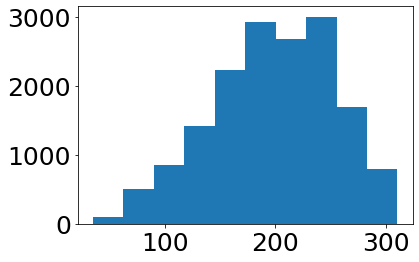

In [81]:
r = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2)

plt.hist(r)
plt.show() 

## Not sure how best to project the points onto a sphere 

In [56]:
slices = [] 
for t in range(min(T), max(T)): 
    x = X[T==t]
    y = Y[T==t]
    z = Z[T==t]
    ids = TrackID[T==t]
    c = len(ids)
    d = {'x': x, 'y': y, 'z': z, 'id': ids, 'count': c}
    slices.append(d)

In [57]:
slices[0]

{'x': array([59509.1, 59421.8, 59573. , 59486.8]),
 'y': array([32157.2, 32121.5, 31909.9, 31868. ]),
 'z': array([69.66, 76.29, 93.74, 84.78]),
 'id': array([1000000000, 1000000001, 1000000002, 1000000003]),
 'count': 4}

In [22]:
# Set up figure plotting 
plt.rc('font', size=25)
fig = plt.figure(figsize=(13, 10))

# Plot the movie one snapshot at a time 
ims = []
for s in slices:
    im = plt.scatter(s['x'], s['y'], c=s['id'])
    ims.append([im])
ani = am.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
mywriter = am.FFMpegWriter()
ani.save("Data/movie.mp4", writer=mywriter)
plt.close()

In [36]:
divisions = [] 
old_id = [] 
for s in slices: 
    ids = s['id']
    indices = np.in1d(ids, old_id, invert=True)
    x = s['x'][indices]
    y = s['y'][indices]
    z = s['z'][indices]
    r = np.sqrt((x-x0)**2+(y-y0)**2)
    c = sum(indices)
    d = {'x':x, 'y':y, 'z':z, 'r':r, 'count':c}
    divisions.append(d)
    old_id = ids 

In [55]:
# Set up figure plotting 
plt.rc('font', size=25)
fig = plt.figure(figsize=(13, 10))

# Plot the movie one snapshot at a time 
ims = []
for d in divisions:
    im = plt.scatter(d['x'], d['y'])
    ims.append([im])
ani = am.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
mywriter = am.FFMpegWriter()
ani.save("Data/div.mp4", writer=mywriter)
plt.close()

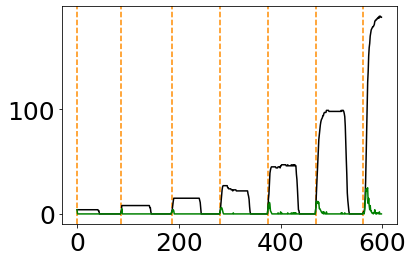

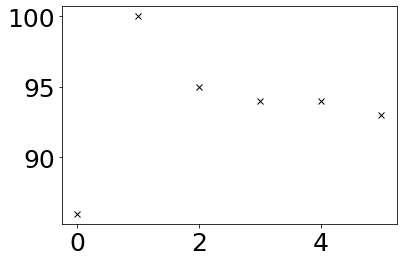

In [104]:
t_span = np.arange(len(slices))
total = np.array([s['count'] for s in slices])
a = (total > 0).astype('int')
diff = a[1:]-a[:-1]
t_start = np.argwhere(diff>0)+1
t_start = np.append(t_start, 0)
t_start = np.sort(t_start)
t_end = np.argwhere(diff<0)

for t in t_start: 
    plt.axvline(x=t, color='darkorange', linestyle='--')
plt.plot(t_span, total, 'k-')
plt.plot(t_span, [d['count'] for d in divisions], 'g-')
plt.show() 

plt.plot(t_start[1:]-t_start[:-1], 'kx')
plt.show() 

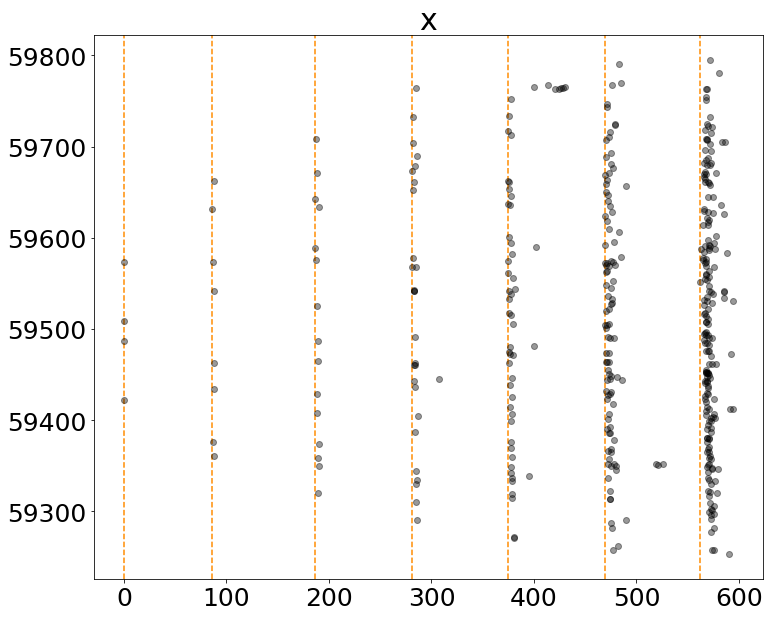

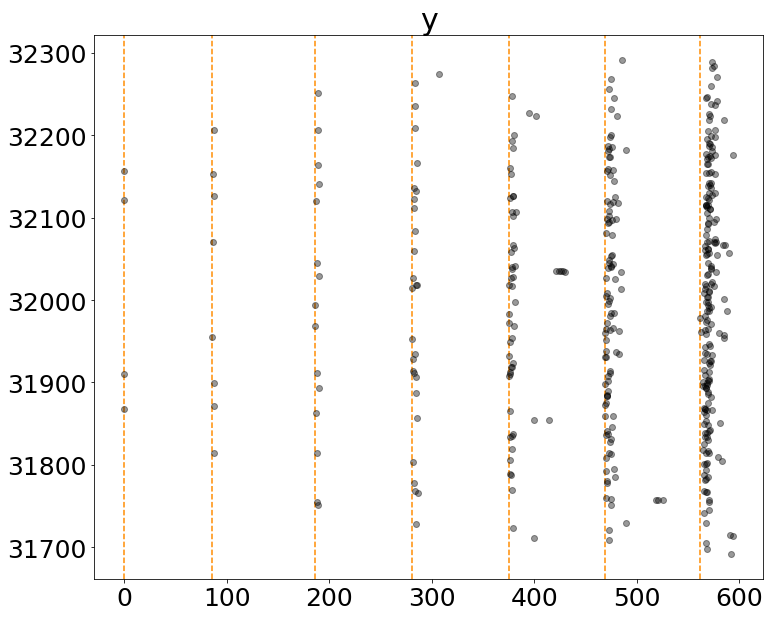

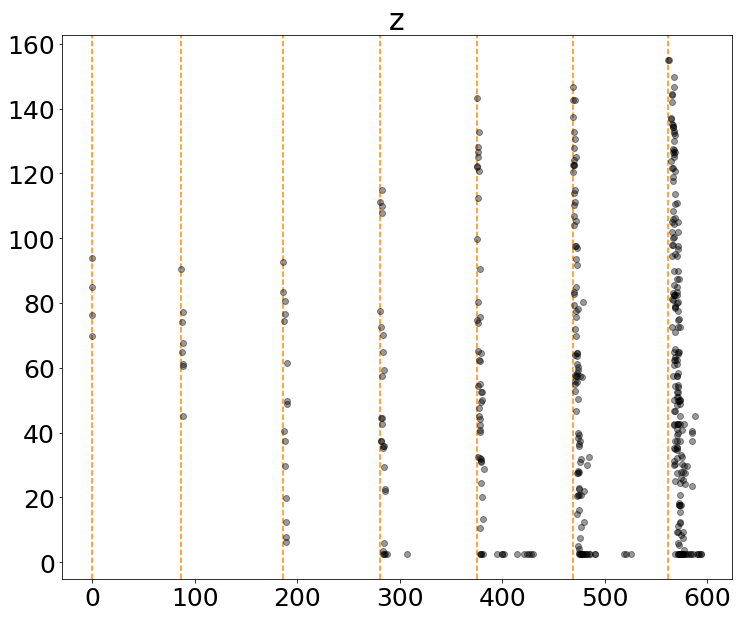

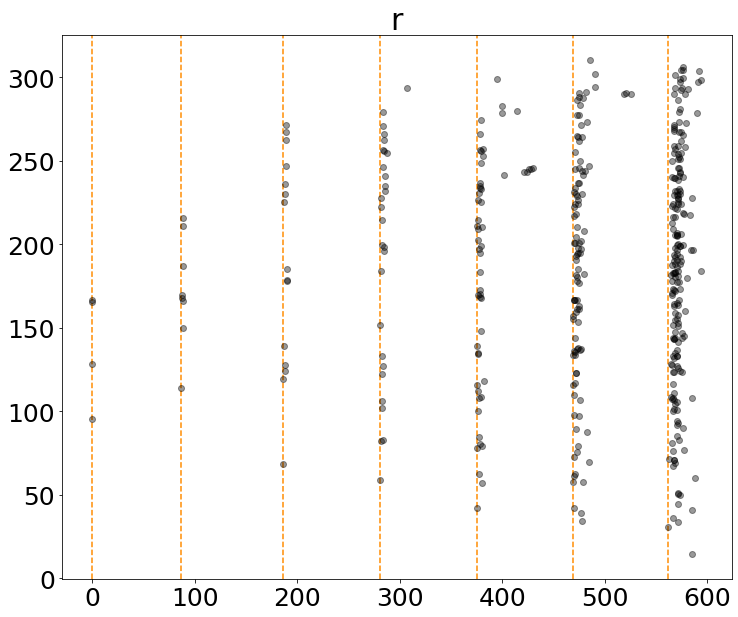

In [103]:
for k in ['x', 'y', 'z', 'r']:
    fig = plt.figure(figsize=(12, 10))
    for t in t_start: 
        plt.axvline(x=t, color='darkorange', linestyle='--')
    for (t, d) in enumerate(divisions):
        r = d[k]
        if len(r)>0: 
            t_array = np.full(len(r), t)
            plt.plot(t_array, r, 'ko', alpha=0.4)
    plt.title(k)
    plt.show() 

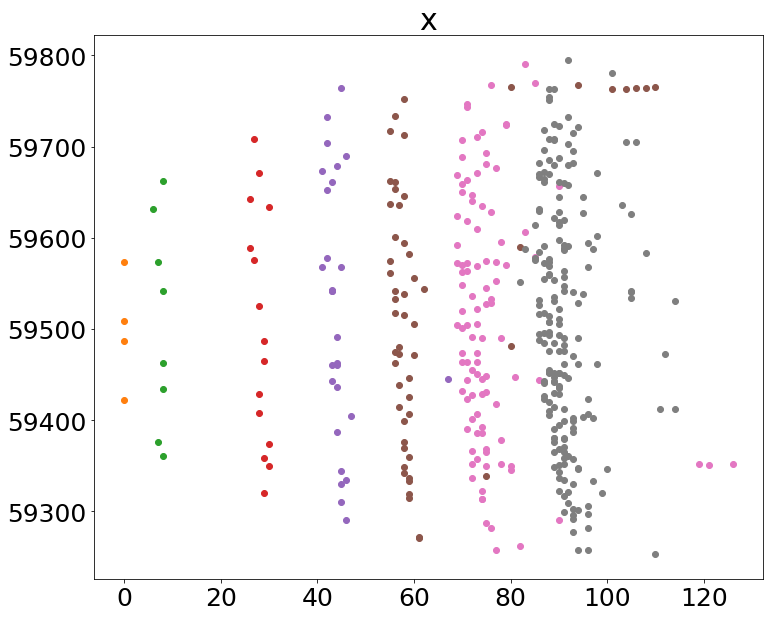

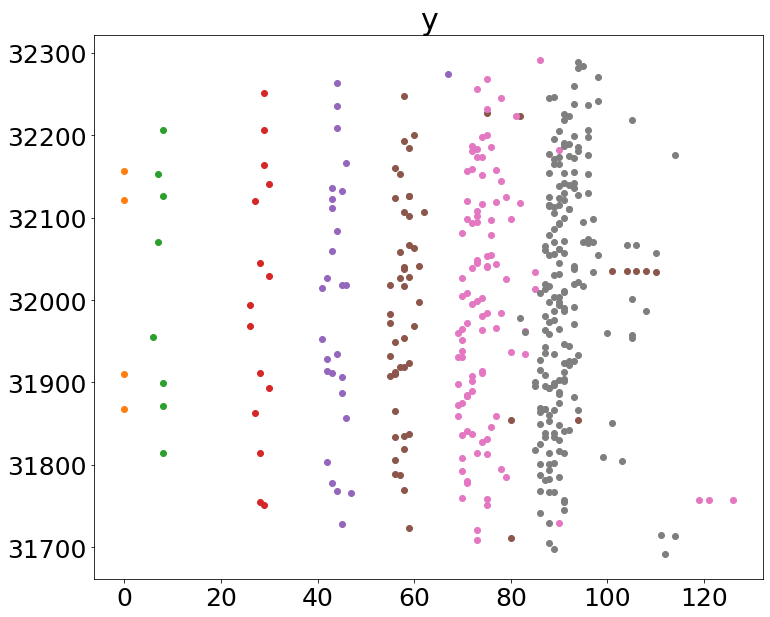

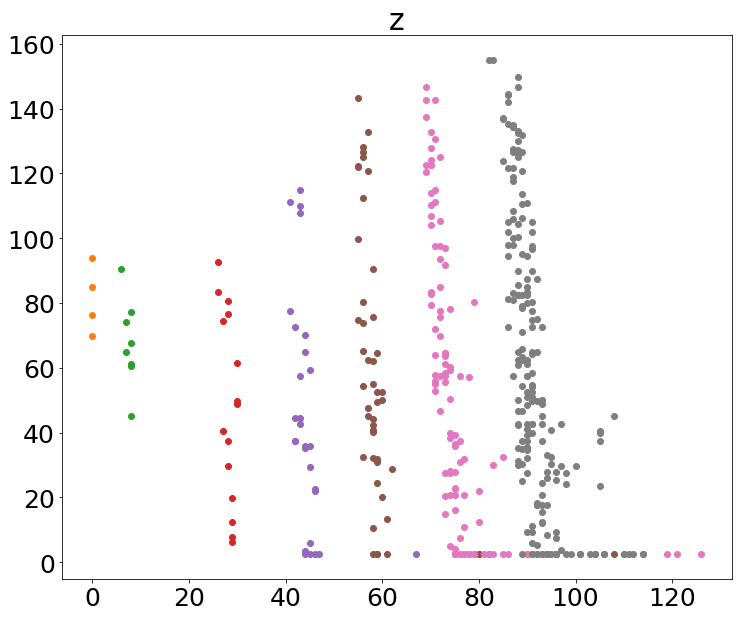

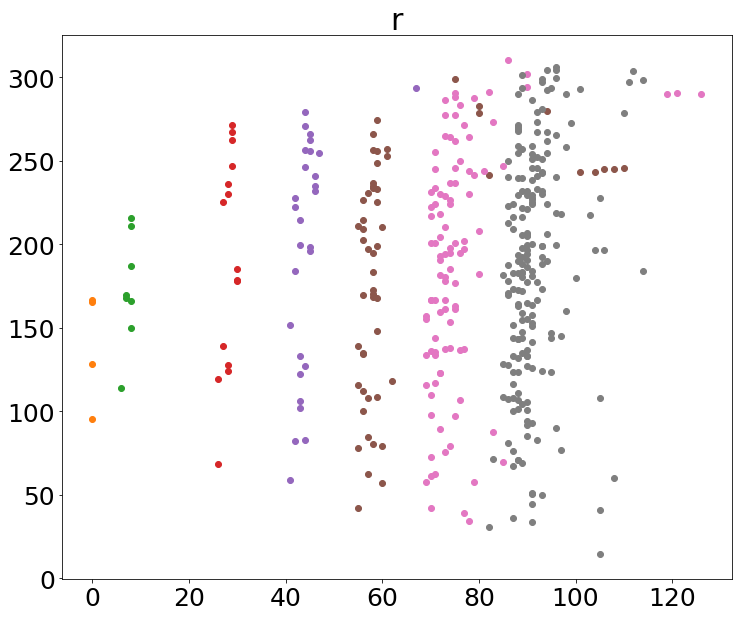

In [157]:
## Subtract off a constant frequency 

omega0 = 80
colors = list(mcolors.TABLEAU_COLORS.values())

for k in ['x', 'y', 'z', 'r']:
    fig = plt.figure(figsize=(12, 10))
#     for (i, t) in enumerate(t_start): 
#         plt.axvline(x=t-i*omega0, color='darkorange', linestyle='--')
    index = 1
    for (t, d) in enumerate(divisions):
        r = d[k]
        if index < len(t_start) and t >= t_start[index]: 
            index += 1 
        t -= (index-1)*omega0
        if len(r)>0: 
            t_array = np.full(len(r), t)
            plt.plot(t_array, r, 'o', color=colors[index])
    plt.title(k)
    plt.show() 